In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
df_collisions = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', dtype=unicode)
df_collisions = df_collisions.drop(['LOCATION', 'CONTRIBUTING FACTOR VEHICLE 3',
                                   'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
                                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis=1)
df_collisions['INTERSECTION'] = df_collisions['ON STREET NAME'] + ' x ' + df_collisions['CROSS STREET NAME']

mask_fatal = (df_collisions['NUMBER OF PERSONS KILLED'] != '0')
df_fatal = df_collisions[mask_fatal]

mask_injured = (df_collisions['NUMBER OF PERSONS INJURED'] != '0')
df_injured = df_collisions[mask_injured]

s_driversLicenses = Series({'BRONX':456847, 'BROOKLYN':983769, 'MANHATTAN':748543,'QUEENS':1134064, 'STATEN ISLAND':304250})
s_registeredVehicles = Series({'BRONX':272483, 'BROOKLYN': 498282, 'MANHATTAN':254159, 'QUEENS':808122, 'STATEN ISLAND':274275})
# Daytime Populations
s_population = Series({'BRONX': 1206423, 'BROOKLYN': 2170477, 'MANHATTAN': 3083102, 'QUEENS': 1846101, 'STATEN ISLAND': 381322})

df_collisions.columns.values

array(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'INTERSECTION'], dtype=object)

# OVERALL

---

## Total Collision Counts

In [5]:
counts_boroughs = df_collisions['BOROUGH'].value_counts()
counts_boroughs_fatal = df_fatal['BOROUGH'].value_counts()
counts_boroughs_injured = df_injured['BOROUGH'].value_counts()

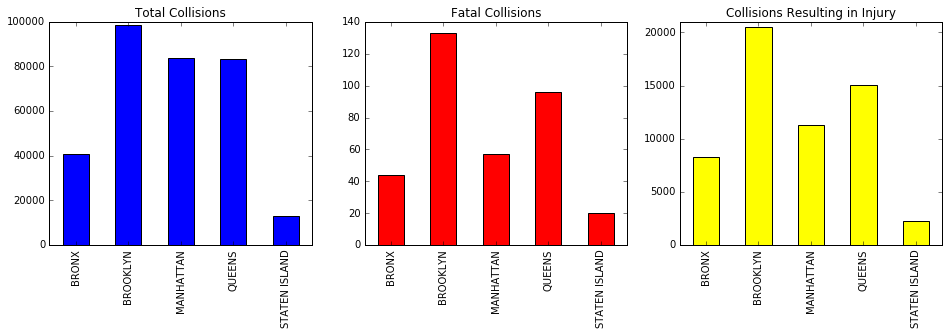

In [6]:
fig, (ax1, ax2, ax3) = subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(16,4))

counts_boroughs.sort_index().plot(kind='bar', ax=ax1)
ax1.set_title('Total Collisions')

counts_boroughs_fatal.sort_index().plot(kind='bar', color='red', ax=ax2)
ax2.set_title('Fatal Collisions')

counts_boroughs_injured.sort_index().plot(kind='bar', color='yellow', ylim=[0,21000], ax=ax3)
ax3.set_title('Collisions Resulting in Injury')

## Normalized Collision Counts

### Per Capita (Daytime Population)

In [7]:
collisions_perCapita = counts_boroughs / s_population
fatalCollisions_perCapita = counts_boroughs_fatal / s_population
injuredCollisions_perCapita = counts_boroughs_injured / s_population

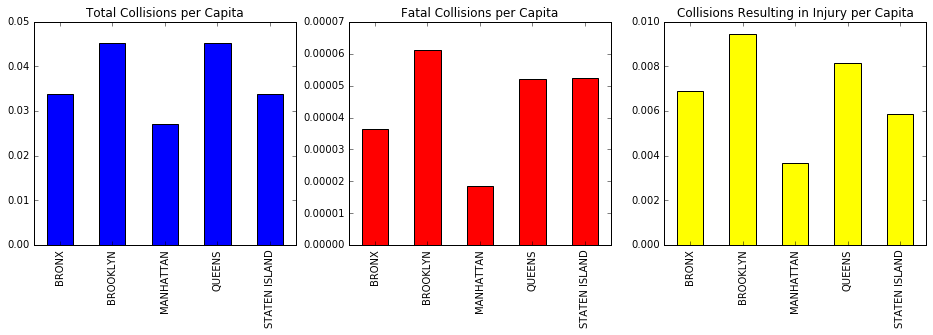

In [8]:
fig, (ax1, ax2, ax3) = subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(16,4))

collisions_perCapita.sort_index().plot(kind='bar', ax=ax1)
ax1.set_title('Total Collisions per Capita')

fatalCollisions_perCapita.sort_index().plot(kind='bar', color='red', ax=ax2)
ax2.set_title('Fatal Collisions per Capita')

injuredCollisions_perCapita.sort_index().plot(kind='bar', color='yellow', ax=ax3)
ax3.set_title('Collisions Resulting in Injury per Capita')

### Per Vehicle

In [9]:
collisions_perVehicle = counts_boroughs / s_registeredVehicles
fatalCollisions_perVehicle = counts_boroughs_fatal / s_registeredVehicles
injuredCollisions_perVehicle = counts_boroughs_injured / s_registeredVehicles

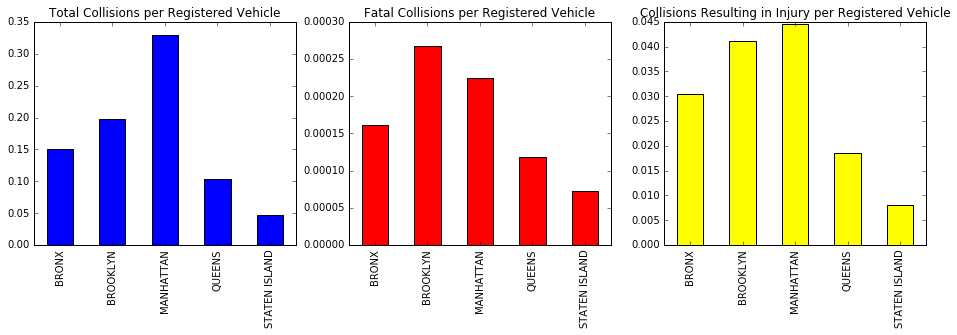

In [10]:
fig, (ax1, ax2, ax3) = subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(16,4))

collisions_perVehicle.sort_index().plot(kind='bar', ax=ax1)
ax1.set_title('Total Collisions per Registered Vehicle')

fatalCollisions_perVehicle.sort_index().plot(kind='bar', color='red', ax=ax2)
ax2.set_title('Fatal Collisions per Registered Vehicle')

injuredCollisions_perVehicle.sort_index().plot(kind='bar', color='yellow', ax=ax3)
ax3.set_title('Collisions Resulting in Injury per Registered Vehicle')

### Per Driver

In [11]:
collisions_perLicense = counts_boroughs / s_driversLicenses
fatalCollisions_perLicense = counts_boroughs_fatal / s_driversLicenses
injuredCollisions_perLicense = counts_boroughs_injured /s_driversLicenses

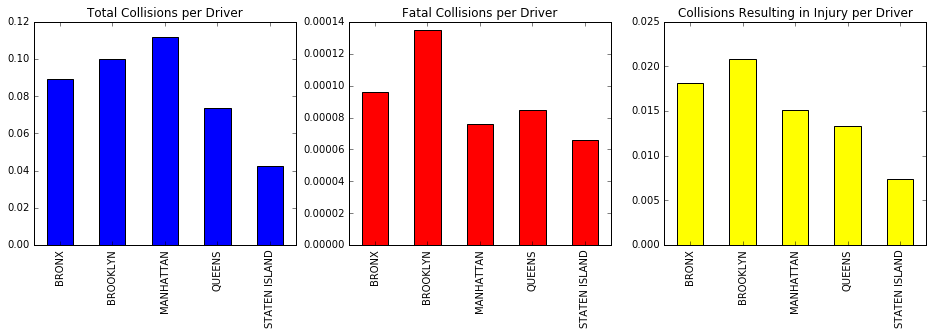

In [12]:
fig, (ax1, ax2, ax3) = subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(16,4))

collisions_perLicense.sort_index().plot(kind='bar', ax=ax1)
ax1.set_title('Total Collisions per Driver')

fatalCollisions_perLicense.sort_index().plot(kind='bar', color='red', ax=ax2)
ax2.set_title('Fatal Collisions per Driver')

injuredCollisions_perLicense.sort_index().plot(kind='bar', color='yellow', ax=ax3)
ax3.set_title('Collisions Resulting in Injury per Driver')

## Fraction of Collisions Fatal/Injury

In [13]:
fraction_boroughs_fatal = counts_boroughs_fatal / counts_boroughs
fraction_boroughs_injured = counts_boroughs_injured / counts_boroughs

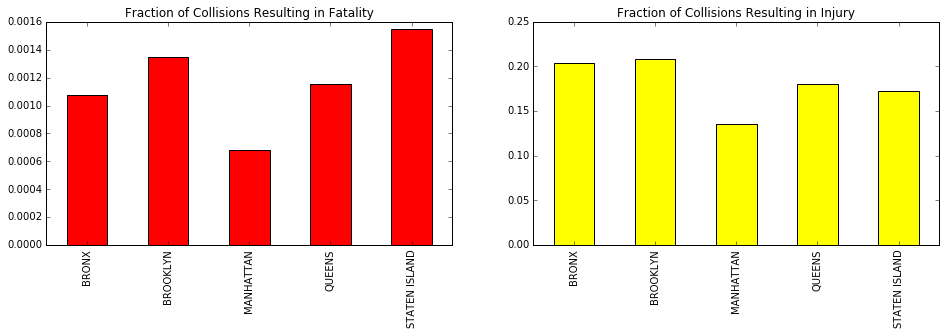

In [14]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

fraction_boroughs_fatal.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Fraction of Collisions Resulting in Fatality')

fraction_boroughs_injured.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Fraction of Collisions Resulting in Injury')

# PEDESTRIANS

---

In [15]:
df_pedDeaths = df_collisions[df_collisions['NUMBER OF PEDESTRIANS KILLED'] != '0']
df_pedInjuries = df_collisions[df_collisions['NUMBER OF PEDESTRIANS INJURED'] != '0']

In [16]:
counts_boroughs_pedDeaths = df_pedDeaths['BOROUGH'].value_counts()
counts_boroughs_pedInjuries = df_pedInjuries['BOROUGH'].value_counts()

## Total Pedestrian Collisions

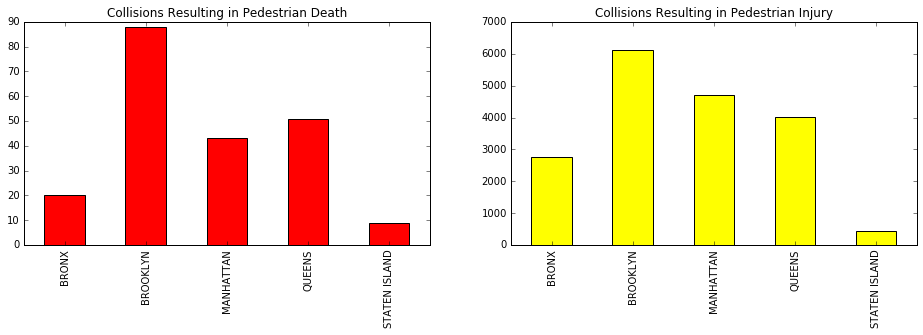

In [17]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

counts_boroughs_pedDeaths.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Collisions Resulting in Pedestrian Death')

counts_boroughs_pedInjuries.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Collisions Resulting in Pedestrian Injury')

## Fraction of Collisions Involving Pedestrians

In [18]:
fraction_boroughs_pedDeaths = counts_boroughs_pedDeaths / counts_boroughs
fraction_boroughs_pedInjuries = counts_boroughs_pedInjuries / counts_boroughs

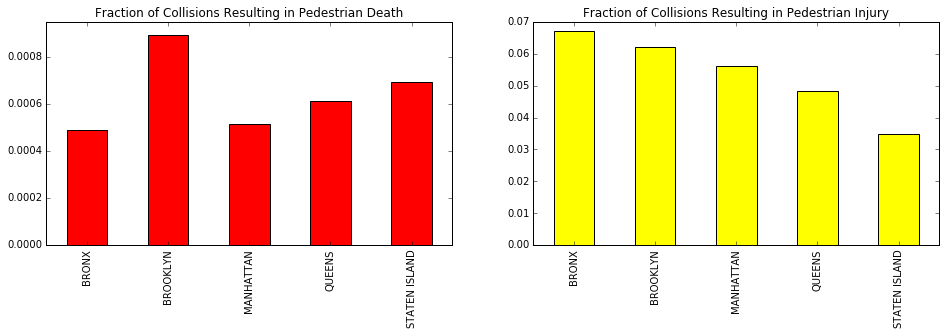

In [19]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

fraction_boroughs_pedDeaths.sort_index().plot(kind='bar', color='red', ax=ax1, ylim=[0,0.00095])
ax1.set_title('Fraction of Collisions Resulting in Pedestrian Death')

fraction_boroughs_pedInjuries.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Fraction of Collisions Resulting in Pedestrian Injury')

## Ped Collisions Per Capita (Daytime Population)

In [21]:
pedFatal_perCapita = counts_boroughs_pedDeaths / s_population
pedInjured_perCapita = counts_boroughs_pedInjuries / s_population

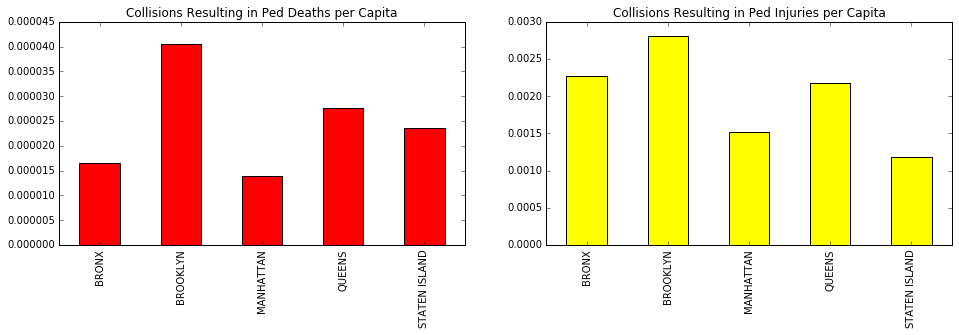

In [24]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

pedFatal_perCapita.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Collisions Resulting in Ped Deaths per Capita')

pedInjured_perCapita.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Collisions Resulting in Ped Injuries per Capita')

# CYCLISTS

---

In [25]:
df_cyclistDeaths = df_collisions[df_collisions['NUMBER OF CYCLIST KILLED'] != '0']
df_cyclistInjuries = df_collisions[df_collisions['NUMBER OF CYCLIST INJURED'] != '0']

In [26]:
counts_boroughs_cyclistDeaths = df_cyclistDeaths['BOROUGH'].value_counts()
counts_boroughs_cyclistInjuries = df_cyclistInjuries['BOROUGH'].value_counts()

## Total Cyclist Collisions

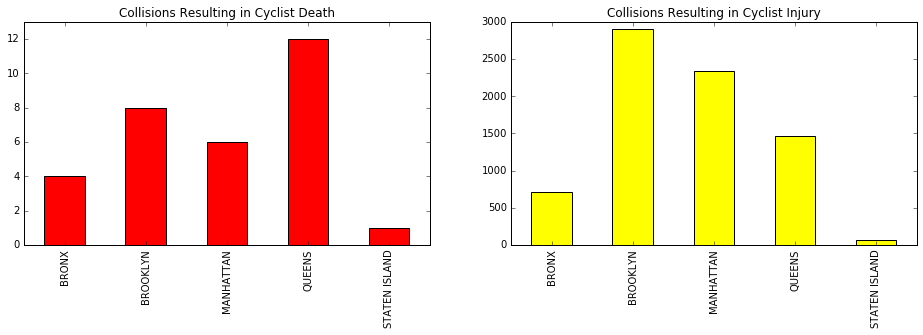

In [29]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

counts_boroughs_cyclistDeaths.sort_index().plot(kind='bar', color='red', ax=ax1, ylim=[0,13])
ax1.set_title('Collisions Resulting in Cyclist Death')

counts_boroughs_cyclistInjuries.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Collisions Resulting in Cyclist Injury')

## Fraction of Collisions Involving Cyclists

In [30]:
fraction_boroughs_cyclistDeaths = counts_boroughs_cyclistDeaths / counts_boroughs
fraction_boroughs_cyclistInjuries = counts_boroughs_cyclistInjuries / counts_boroughs

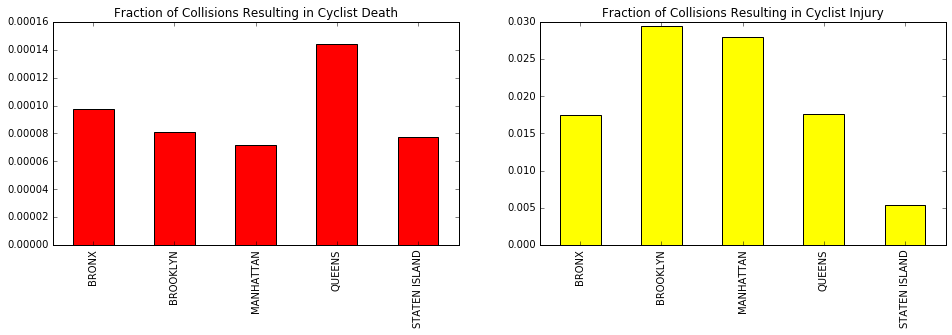

In [32]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

fraction_boroughs_cyclistDeaths.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Fraction of Collisions Resulting in Cyclist Death')

fraction_boroughs_cyclistInjuries.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Fraction of Collisions Resulting in Cyclist Injury')

## Cyclist Collisions Per Capita

In [33]:
cyclistFatal_perCapita = counts_boroughs_cyclistDeaths / s_population
cyclistInjured_perCapita = counts_boroughs_cyclistInjuries / s_population

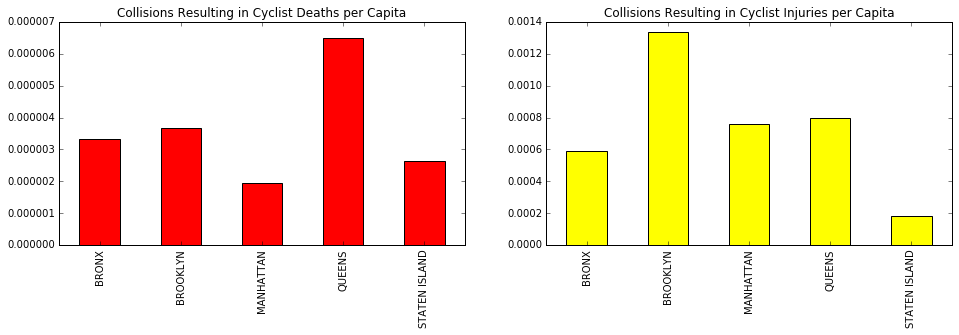

In [35]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

cyclistFatal_perCapita.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Collisions Resulting in Cyclist Deaths per Capita')

cyclistInjured_perCapita.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Collisions Resulting in Cyclist Injuries per Capita')

# PASSENGERS

---

In [41]:
df_collisions.loc[:,'NUMBER OF PERSONS KILLED'] = map(int, df_collisions['NUMBER OF PERSONS KILLED'])
df_collisions.loc[:,'NUMBER OF PEDESTRIANS KILLED'] = map(int, df_collisions['NUMBER OF PEDESTRIANS KILLED'])
df_collisions.loc[:,'NUMBER OF CYCLIST KILLED'] = map(int, df_collisions['NUMBER OF CYCLIST KILLED'])

df_collisions.loc[:, 'NUMBER OF PERSONS INJURED'] = map(int, df_collisions['NUMBER OF PERSONS INJURED'])
df_collisions.loc[:, 'NUMBER OF PEDESTRIANS INJURED'] = map(int, df_collisions['NUMBER OF PEDESTRIANS INJURED'])
df_collisions.loc[:, 'NUMBER OF CYCLIST INJURED'] = map(int, df_collisions['NUMBER OF CYCLIST INJURED'])

df_collisions['NUMBER OF PASSENGERS KILLED'] = df_collisions['NUMBER OF PERSONS KILLED'] - df_collisions['NUMBER OF PEDESTRIANS KILLED'] - df_collisions['NUMBER OF CYCLIST KILLED']
df_collisions['NUMBER OF PASSENGERS INJURED'] = df_collisions['NUMBER OF PERSONS INJURED'] - df_collisions['NUMBER OF PEDESTRIANS INJURED'] - df_collisions['NUMBER OF CYCLIST INJURED']

In [42]:
df_passengerDeaths = df_collisions[df_collisions['NUMBER OF PASSENGERS KILLED'] > 0]
df_passengerInjuries = df_collisions[df_collisions['NUMBER OF PASSENGERS INJURED'] > 0]

In [43]:
counts_boroughs_passengerDeaths = df_passengerDeaths['BOROUGH'].value_counts()
counts_boroughs_passengerInjuries = df_passengerInjuries['BOROUGH'].value_counts()

## Total Collisions with Passenger Injury/Death

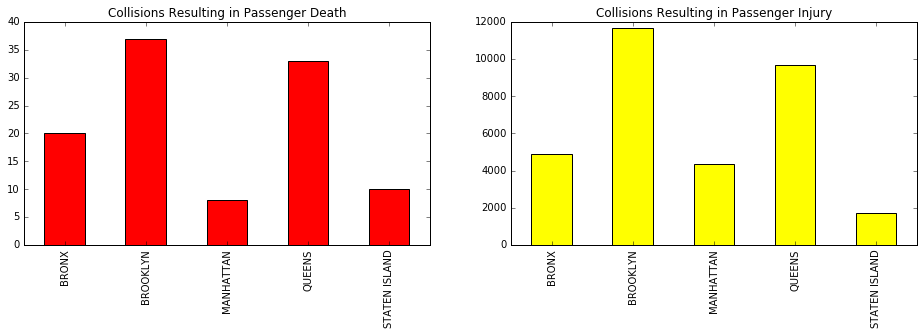

In [45]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

counts_boroughs_passengerDeaths.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Collisions Resulting in Passenger Death')

counts_boroughs_passengerInjuries.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Collisions Resulting in Passenger Injury')

## Fraction of Collisions Resulting in Passenger Injury/Death

In [46]:
fraction_boroughs_passengerDeaths = counts_boroughs_passengerDeaths / counts_boroughs
fraction_boroughs_passengerInjuries = counts_boroughs_passengerInjuries / counts_boroughs

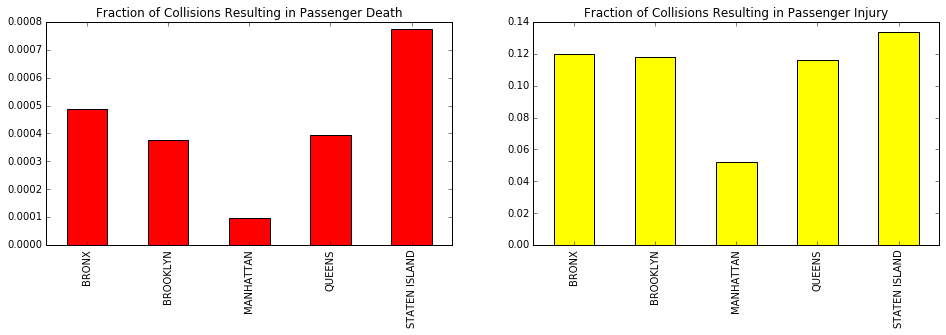

In [47]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

fraction_boroughs_passengerDeaths.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Fraction of Collisions Resulting in Passenger Death')

fraction_boroughs_passengerInjuries.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Fraction of Collisions Resulting in Passenger Injury')

## Collisions Resulting in Passenger Injury/Death Per Capita

In [48]:
passengerFatal_perCapita = counts_boroughs_passengerDeaths / s_population
passengerInjured_perCapita = counts_boroughs_passengerInjuries / s_population

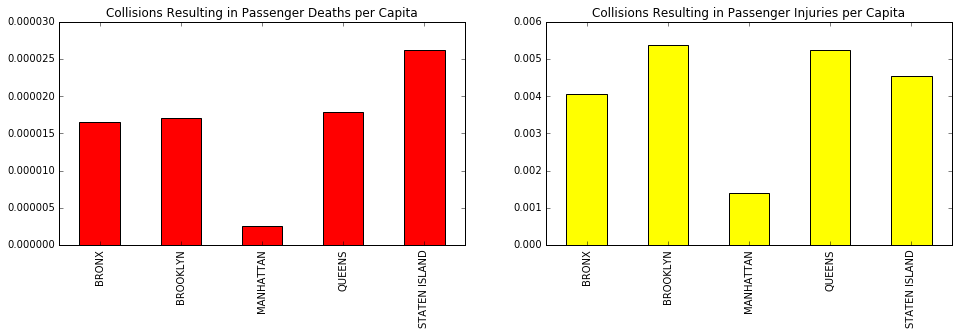

In [49]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,4))

passengerFatal_perCapita.sort_index().plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Collisions Resulting in Passenger Deaths per Capita')

passengerInjured_perCapita.sort_index().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_title('Collisions Resulting in Passenger Injuries per Capita')